<a href="https://colab.research.google.com/github/damianphung/python_notebooks/blob/main/fastAI_transfer_learning_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
subscription_key = "XXXX"

In [ ]:
 from pathlib import Path
 import requests

 url_path = Path()
 url_path = url_path / "azure_puppies"
 if not url_path.exists():
     url_path.mkdir(mode=0o777, parents=False, exist_ok=False)
 
 for idx, image in enumerate(search_results["value"]):
    print(image["contentUrl"])
    response = requests.get(image["contentUrl"])
    fileName = str(idx) + '.' + image["contentUrl"][-3:] # last 3 chars
    download_path = url_path / fileName
    with open(download_path, "wb") as file:
        file.write(response.content)

https://cdn.pixabay.com/photo/2016/02/09/12/25/puppy-1189067_640.jpg
https://cdn.pixabay.com/photo/2017/10/26/05/15/dog-2890078_640.jpg
https://www.maxpixels.net/static/photo/640/Cute-Little-Healthy-Mammal-Animal-Rabbit-Puppies-4493439.jpg
https://cdn.pixabay.com/photo/2017/08/15/23/20/puppy-2645966_640.jpg
https://get.pxhere.com/photo/white-sweet-puppy-dog-animal-cute-looking-pet-fur-young-sitting-small-mammal-friend-vertebrate-domestic-adorable-dog-breed-breed-pup-samoyed-cute-puppy-korean-jindo-dog-dog-like-mammal-carnivoran-dog-breed-group-greenland-dog-japanese-spitz-american-eskimo-dog-609173.jpg
https://static.pexels.com/photos/162276/tibet-terrier-cute-pet-dog-162276.jpeg
https://www.publicdomainpictures.net/pictures/40000/velka/puppies.jpg
https://i2.pickpik.com/photos/689/495/596/puppies-chihuahua-animals-dogs-preview.jpg
https://c0.wallpaperflare.com/preview/529/160/981/black-and-white-puppy-do-dog.jpg
https://cdn.pixabay.com/photo/2017/04/19/21/29/dog-2243682_640.jpg
https:

In [ ]:
# Verify by using the PIL image library.
def verify_img(image):
    try:
        im = Image.open(image)
        im.draft(im.mode, (32,32))
        im.load()
        return True
    except:
        return False

def verify_imgs(images):
    # See https://medium.com/@robertbracco1/how-to-do-fastai-even-faster-bebf9693c99a
    listify = [ images[i] for i, valid_img in enumerate(parallel(verify_img, images)) if not valid_img ]
    print(listify)
 
for puppy in url_path.ls():
    valid_image = verify_img(puppy)
    if not valid_image:
        print(puppy)
        os.unlink(puppy)

In [ ]:
doc(parallel)

# FastAI way data cleaning

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 9.2MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 1.0MB 49.9MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 194kB 54.5MB/s 
     |████████████████████████████████| 40kB 7.3MB/s 
     |████████████████████████████████| 92kB 13.2MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
     |████████████████████████████████| 51kB 9.9MB/s 
     |████████████████████████████████| 2.7MB 50.9MB/s 


### Test

In [ ]:
from fastbook import *

In [ ]:
from pathlib import Path
p = Path().cwd()
p = p / "images"
if not p.exists():
    p.mkdir(mode=0o777, parents=False, exist_ok=False)

In [ ]:
dest = 'images/puppy.jpg'
download_url(ims[0], dest)

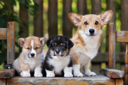

In [ ]:
im = Image.open(dest)
im.to_thumb(128, 128)

### For real

In [ ]:
!rm -rf /content/animals

In [ ]:
path = Path('animals')

animals = [ 'kittens', 'puppies']
if not path.exists():
    path.mkdir()
    for o in animals:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(subscription_key, o)
        download_images(dest, urls=results.attrgot('content_url'))

### Verify images
Recursively scan through the images downloaded and verify it's actually an image file

In [ ]:
fns = get_image_files(path)
fns

(#295) [Path('animals/kittens/00000057.jpeg'),Path('animals/kittens/00000020.jpg'),Path('animals/kittens/00000004.jpg'),Path('animals/kittens/00000103.jpg'),Path('animals/kittens/00000030.jpg'),Path('animals/kittens/00000101.jpg'),Path('animals/kittens/00000086.jpg'),Path('animals/kittens/00000014.jpg'),Path('animals/kittens/00000090.jpg'),Path('animals/kittens/00000126.jpeg')...]

In [ ]:
failed = verify_images(fns)
failed

(#7) [Path('animals/kittens/00000123.jpg'),Path('animals/kittens/00000066.jpg'),Path('animals/puppies/00000060.jpg'),Path('animals/puppies/00000059.jpg'),Path('animals/puppies/00000052.jpg'),Path('animals/puppies/00000066.jpg'),Path('animals/puppies/00000113.jpg')]

In [ ]:
failed.map(Path.unlink);

# FastAI way

In [ ]:
animals_dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = animals_dblock.dataloaders(path)

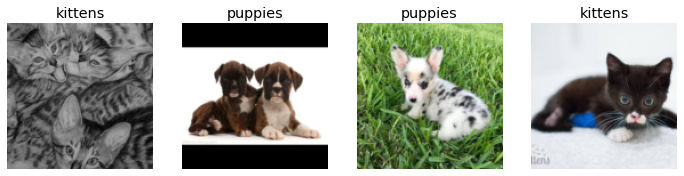

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

### Padding
By default Resize crops the image, which may result in cutting in important details of the image we feed in to the model.

We can make use of padding to avoid this.
Padding however can lead to more wasted computation than needed. Instead we can randomly pad some images 

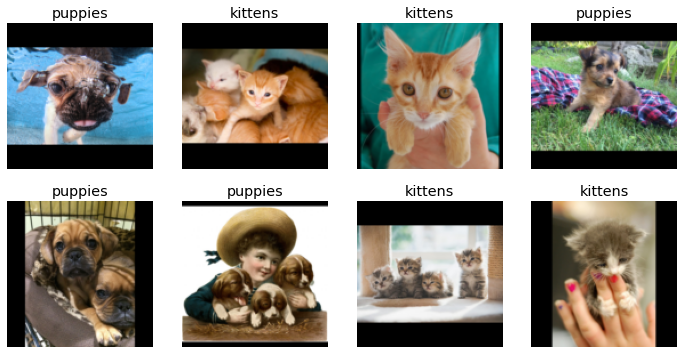

In [ ]:
animals_dblock = animals_dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = animals_dblock.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

### Data augmentation

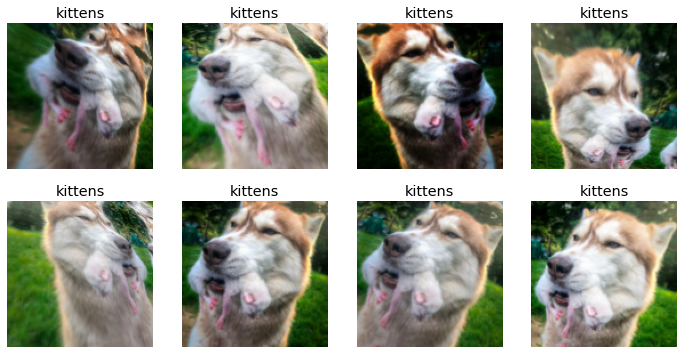

In [ ]:
animals_dblock = animals_dblock.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = animals_dblock.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Training model and cleaning data

In [ ]:
animals_dblock = animals_dblock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [ ]:
dls = animals_dblock.dataloaders(path)

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.264568,0.310506,0.140351,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.354776,0.222236,0.052632,00:08
1,0.273995,0.186712,0.035088,00:08
2,0.207667,0.146454,0.035088,00:08
3,0.193918,0.123895,0.035088,00:08


### Sanity check our model predictions on sample data set
Let's plot the matrix of the results of training our fine-tuned model.

Actual vs Predicted should match. Otherwise this means it made a wrong prediction


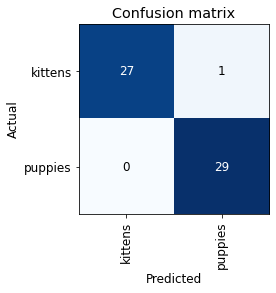

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

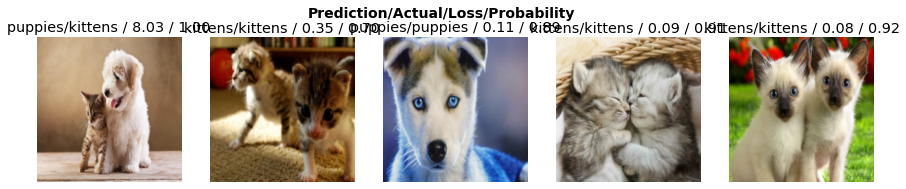

In [ ]:
interp.plot_top_losses(5, nrows=1)

### Human verification of images to move / keep

In [ ]:
# fastbook.setup_book()
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# To move images for which we've selected a different category, we would run:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
# To delete (unlink) all images selected for deletion
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

## Exporting pkl model

In [ ]:
## Docs

learn.export()

```python
def export(self:Learner, fname='export.pkl', pickle_protocol=2):
    "Export the content of `self` without the items and the optimizer state for inference"
    if rank_distrib(): return # don't export if child proc
    self._end_cleanup()
    old_dbunch = self.dls
    self.dls = self.dls.new_empty()
    state = self.opt.state_dict() if self.opt is not None else None
    self.opt = None
    with warnings.catch_warnings():
        #To avoid the warning that come from PyTorch about model not being checked
        warnings.simplefilter("ignore")
        torch.save(self, self.path/fname, pickle_protocol=pickle_protocol)
    self.create_opt()
    if state is not None: self.opt.load_state_dict(state)
    self.dls = old_dbunch

def load_learner(fname, cpu=True):
    "Load a `Learner` object in `fname`, optionally putting it on the `cpu`"
    distrib_barrier()
    res = torch.load(fname, map_location='cpu' if cpu else None)
    if hasattr(res, 'to_fp32'): res = res.to_fp32()
    if cpu: res.dls.cpu()
    return res
```

In [ ]:
# from pathlib import Path
# learn.export()
# from fastai import *
path = Path()
path.ls(file_exts='.pkl')

# path.parent.ls()

(#1) [Path('export.pkl')]

#### Loading for inference

In [ ]:
learn_inf = load_learner('export.pkl')
# learn_inf = load_learner(path)
# From Test section
learn_inf.predict('images/puppy.jpg')

('puppies', tensor(1), tensor([6.8700e-04, 9.9931e-01]))

In [ ]:
learn_inf.dls.vocab

['kittens', 'puppies']

This tells us that it has a 97.54% confidence of it being a puppy. 

Lets do it as if we are opening an image file via PIL and numPY

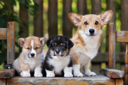

In [ ]:
from PIL import Image
import numpy as np
im = Image.open("images/puppy.jpg")
im.to_thumb(128,128)

In [ ]:
pred,pred_idx,probs = learn_inf.predict(np.asarray(im))

In [ ]:
print(f"Prediction: {pred}; Probability {probs[pred_idx]:.04f}")

Prediction: puppies; Probability 0.9993


## Turning Your Notebook into a Real App

In [ ]:
!pip install voila

In [ ]:
!jupyter serverextension enable voila —sys-prefix

Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
